<a href="https://colab.research.google.com/github/rishab-gangwar/PyTorchPlayground/blob/main/PyTorchRevision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing relevant libarary

In [ ]:
# !wget https://cs.stanford.edu/people/rak248/VG_100K_2/images.zip


In [ ]:
# !wget https://cs.stanford.edu/people/rak248/VG_100K_2/images2.zip

In [ ]:
import torch
import numpy as np 

import matplotlib.pyplot as plt

In [ ]:
!pip install torchviz
import torchviz
from torchviz import make_dot

#Initialization

In [ ]:

x=torch.ones(3,2)
print(x)
x=torch.zeros(3,2)
print(x)
x=torch.rand(3,2)
print(x)

In [ ]:
x=torch.empty(3,2)
print(x)
y=torch.zeros_like(x)
print(y)

In [ ]:
x= torch.linspace(0,1,steps=14)
print(x)

In [ ]:
x=torch.tensor([[1,2],
                [3,4],
                [5,6]])
print(x)

#slicing

In [ ]:
print(x.size())
print(x)
print(x[0,:])
print(x[:,1])

In [ ]:
y=x[1,1]
print(y)
print(y.item(),type(y.item()))

#reshaping

In [ ]:
y=x.view(6,-1)
z=x.view(-1,6)
print(x,y,z)

#simple tensor operations

In [ ]:
x= torch.ones(3,2)
y= torch.ones(3,2)
x=x*3
y*=2
z=y.add_(x)

print(x,y,z)

In [ ]:
x= torch.ones(3,2)
y= torch.ones(3,2)
x=x*3
y*=2
q=y.add(x)
print(x,y,q)

#Numpy<-->pytorch

In [ ]:
x_np=x.numpy()
print(x,x_np,type(x),type(x_np))

In [ ]:
a=np.random.randn(5)
print(a)
a_pt=torch.from_numpy(a)
print(type(a),type(a_pt))

In [ ]:
#flaw
np.add(a,1,out=a)
print(a,a_pt)

In [ ]:
np.add(a,1,out=a)
print(a)

#CUDA support

In [ ]:
print(torch.cuda.device_count())

In [ ]:
# print(torch.cuda.device(0))
# print(torch.cuda.get_device_name(0))

In [ ]:
# cuda0=torch.device('cuda:0')

In [ ]:
# a=torch.ones(3,2,device=cuda0)
# b=torch.ones(3,2,device=cuda0)
# c=a+b

In [ ]:
# print(c)

In [ ]:
# print(a)

In [ ]:
# %%time
# for i in range(10):
#   a_cpu = torch.randn([10000, 10000])
#   b_cpu = torch.randn([10000, 10000])
#   b_cpu.add_(a_cpu)

In [ ]:
# %%time
# for i in range(10):
#   a = torch.randn([10000, 10000],device=cuda0)
#   b = torch.randn([10000, 10000],device=cuda0)
#   b.add_(a)

In [ ]:
# %%time
# for i in range(5):
#   a_cpu = torch.randn([10000, 10000])
#   b_cpu = torch.randn([10000, 10000])
#   torch.matmul(a_cpu,b_cpu)

In [ ]:
# %%time
# # for i in range(100):
#   a = torch.randn([10000, 10000],device=cuda0)
#   b = torch.randn([10000, 10000],device=cuda0)
#   torch.matmul(a,b)

#autograd in pytorch

In [ ]:
x = torch.ones([3,2], requires_grad=True)
print(x)

In [ ]:
y= x + 5  
print(y)

In [ ]:
z = y*y+1
print(z)

In [ ]:
t = torch.sum(z)
print(t)

In [ ]:
t.backward()

In [ ]:
print(x.grad)

In [ ]:
x = torch.ones([3,2],requires_grad=True)
y = x + 5
r = 1/(1+torch.exp(-y))
print(r)
s = torch.sum(r)
s.backward()
print(x.grad)

In [ ]:
x = torch.ones([3,2],requires_grad=True)
y = x + 5
r = 1/(1+torch.exp(-y))
print(r)
s = torch.sum(r)
a=torch.ones([3,2])
r.backward(a)
print(x.grad)

#learning loop in PyTorch

In [ ]:
 x=torch.randn([20,1],requires_grad=True)
 y=3*x-2

In [ ]:
w=torch.tensor([1.],requires_grad=True)
b=torch.tensor([1.],requires_grad=True)
y_hat = w*x+b
loss=torch.sum((y_hat-y)**2)

In [ ]:
print(loss)

In [ ]:
loss.backward()

In [ ]:
print(w.grad,b.grad)

In [ ]:
epochs=108
lr=.01
w=torch.tensor([1.],requires_grad=True)
b=torch.tensor([1.],requires_grad=True)
for i in range(epochs):
  x=torch.randn([20,1])
  y=3*x-2
  y_hat=w*x+b
  loss=torch.sum((y_hat-y)**2)
  loss.backward()
  with torch.no_grad():
    w-=w.grad*lr
    b-=b.grad*lr
    w.grad.zero_()
    b.grad.zero_()
    print(w,b,"")

#Feed forward neural net

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import matplotlib

In [ ]:
torch.manual_seed(0)

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [ ]:
from numpy.random.mtrand import RandomState
data, labels =make_blobs(n_samples=1000, n_features=2,centers=4,random_state=0)

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

In [ ]:
X_train,X_val,Y_train,Y_val=map(torch.tensor,(X_train,X_val,Y_train,Y_val))

In [ ]:
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

In [ ]:
def model(x):
  a1=torch.matmul(x,weights1)+bias1
  h1=a1.sigmoid()
  # print(h1.shape)
  a2=torch.matmul(h1,weights2)+bias2
  h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2

In [ ]:
def loss_fn(y_,y):
  return -(y_[range(y.shape[0]),y].log()).mean()

In [ ]:
def accuracy(y_,y):
  ypred=torch.argmax(y_,dim=1)
  return (ypred==y).float().mean()

In [ ]:
import math
torch.manual_seed(0)
weights1=torch.randn(2,2)/math.sqrt(2)
weights1.requires_grad_()
bias1=torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2,4)/math.sqrt(2)
weights2.requires_grad_()

bias2=torch.zeros(4, requires_grad=True)
lr=.2
epochs=10000


X_train=X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []
for epoch in range(epochs):
  y_=model(X_train)
  loss = loss_fn(y_,Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_,Y_train))
  with torch.no_grad():
    weights1-=lr*weights1.grad
    weights2-=lr*weights2.grad

    bias1-=lr*bias1.grad
    bias2-=lr*bias2.grad
    weights1.grad.zero_()
    weights2.grad.zero_()
    bias1.grad.zero_()
    bias2.grad.zero_()
plt.plot(loss_arr,'r-')
plt.plot(acc_arr,'b-')

In [ ]:
acc_arr[9990]


In [ ]:
y=model(X_train)

#`-----------------------------------NN.parameters---------------------------`

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class FirstNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1= nn.parameter(torch.randn(2,2))/math.sqrt(2)
    self.weights2= nn.parameters(torch.randn(2,4))/math.sqrt(2)
    self.bias1=nn.parameters(torch.randn(2))
    self.bias2=nn.parameters(torch.randn(4))
  def forward(self,X):
    a1=torch.matmul(X,self.weights1)+self.bias1
    h1=a1.sigmoid()
    a2=torch.matmul(h1,self.weights2)+self.bias2
    h2=a2.sigmoid()
    return h2
  



In [ ]:
def fit(epochs=10000,lr=.2):
  loss_arr=[]
  acc_arr=[]
  for epoch in range(epochs):
    y_hat=fn(X_train)
    loss=F.cross_entropy(y_hat,Y_train)
    loss_arr.append(loss)
    acc_arr.append(accuracy(y_hat,Y_train))
    loss.backward()
    with torch.no_grad():
      for param in parameters:
        param-=lr*param.grad
      fn.zero_grad()

  plt.plot(loss_arr,'r-')
  plt.plot(acc_arr,'b-')


In [ ]:
from torch.nn import functional as F
class secondnetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(2,2)
    self.l2=nn.Linear(2,4)
  def forward(self,x):
    a1=self.l1(x)
    h1=a1.sigmoid()
    a2=self.l2(h1)
    h2=a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2
def accuracy(y_,y):
  pred=torch.argmax(y_,dim=1)
  return (pred==y).float().mean()


def fit(epochs=10000,lr=.1):
  err_arr=[]
  acc_arr=[]
  for epoch in range(epochs):
    y_=feednet(X_train)
    error=F.cross_entropy(y_,Y_train)
    err_arr.append(error.item())
    acc_arr.append(accuracy(y_,Y_train))
    error.backward()
    with torch.no_grad():
      for param in feednet.parameters():
        param-=lr*param.grad
      feednet.zero_grad()
  plt.plot(err_arr,'r-')
  plt.plot(acc_arr,'b-')
feednet=secondnetwork()
fit()





#`*CNNs`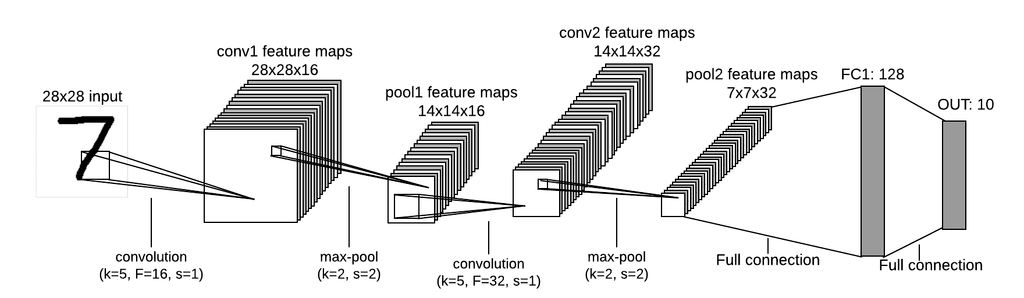

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset= torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transforms.ToTensor())

In [ ]:
classes=['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=8,shuffle=True)
dataloader=iter(trainloader)
images,labels=dataloader.next()

In [ ]:
imglist=[image for image in images]
print(imglist[0].shape)

In [ ]:
class alayerCNN(nn.Module):
  def __init__(self):
    super(alayerCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3)
  def forward(self,x):
    x=self.conv1(x)
    return x

In [ ]:
cnn=alayerCNN()
out=cnn(images)
print(out.shape)

In [ ]:
for param in cnn.parameters():
  print(param.shape)

In [ ]:
from itertools import repeat
out= list(map(np.transpose,[image for image in (image.detach().numpy() for image in images)],repeat((1,2,0))))

In [ ]:
fig,ax=plt.subplots(4,2)
for i,img in enumerate(out):

  ax[i//2,i%2].imshow(img)

In [ ]:
def imgloader(images):
  return list(map(np.transpose,[image for image in (image.detach().numpy() for image in images)],repeat((1,2,0))))

In [ ]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' ' ,'  '.join(classes[labels[j]] for j in range(8)))

In [ ]:
class AlayerCNN(nn.Module):
  def __init__(self):
    super(AlayerCNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,3)
  def forward(self,x):
    x=self.conv1(x)
    return x

In [ ]:
cnn=AlayerCNN()
out=cnn(images)
print(out.shape)

In [ ]:
cnnw=[]
for param in cnn.parameters():
  cnnw.append(param)
  break

for i in out:
  print(i.shape)

#visualization of weights and cnn outputs

In [ ]:
print(cnnw[0].shape)

In [ ]:
def imgloader(images):
  return list(map(np.transpose,[image for image in (image.detach().numpy() for image in images)],repeat((1,2,0))))

In [ ]:
def plot_cnn_weights(weights,out_filters,channels):
  outlist=imgloader(weights)
  plt.rcParams["figure.figsize"] = (out_filters*5,out_filters*5)
  fig,ax= plt.subplots(out_filters,channels)
  for i,imspace in enumerate(outlist):
    for j in range(channels):
      print(i,end=" ")
      ax[i,j].imshow(imspace[:,:,j])
    print()

In [ ]:
plot_cnn_weights(cnnw[0],16,3)

In [ ]:
def plot_cnn_outputs(out,batchsize,channels):
  outlist=imgloader(out)
  if(batchsize>channels):
    plt.rcParams["figure.figsize"] = (4*batchsize,channels*4*(batchsize-channels))
  else:
    plt.rcParams["figure.figsize"] = (batchsize*4*(channels-batchsize),4*channels)
  fig,ax= plt.subplots(batchsize,channels)
  for i,imspace in enumerate(outlist):
    for j in range(channels):
      print(i,end=" ")
      ax[i,j].imshow(imspace[:,:,j])
    print()

In [ ]:
plot_cnn_outputs(out,8,16)

In [ ]:
plot_cnn_weights(out,8,16)

#deep convolutional network

In [ ]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2,self).__init__()
    self.model=nn.Sequential(
        nn.Conv2d(3,8,3),
        nn.Conv2d(8,16,3)
        )
  def forward(self,x):
    x=self.model(x)
    return x

In [ ]:
net = FirstCNN_v2()
out=net(images)
out.shape

In [ ]:
plot_cnn_outputs(out,8,16)

In [ ]:

for i in net.parameters():
  print(i.shape)

In [ ]:
params=list(net.parameters())
weights=params[2]

In [ ]:
plot_cnn_weights(weights,16,8)

In [ ]:
class firstCNN_v3(nn.Module):
  def __init__(self):
    super(firstCNN_v3,self).__init__()
    self.model=nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,5),
        nn.AvgPool2d(2,stride=2)
    )
  def forward(self,x):
    x=self.model(x)
    return x


In [ ]:
net = firstCNN_v3()
out=net(images)
out.shape

#LeNet

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model=nn.Sequential(
        nn.Conv2d(3,6,5),   #(N,3,32,32) --> (N,6,28,28)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2),   #(N,6,28,28) --> (N,6,14,14)
        nn.Conv2d(6,16,5),   #(N,6,14,14)--> (N,16,10,10)
        nn.Tanh(),
        nn.AvgPool2d(2,stride=2)# (N,16,10,10) --> (N,16,5,5)
    )
    self.fc_model=nn.Sequential(
        nn.Linear(400,120),# (N,400) ->(N,120)
        nn.Tanh(),
        nn.Linear(120,84), #(N,120)  -> (N,84)
        nn.Tanh(),
        nn.Linear(84,10)  #(N,84) --> (N,10)
    )
  def forward(self,x):
    x=self.cnn_model(x)
    x=x.view(x.size(0),-1)
    x=self.fc_model(x)
    return x

In [ ]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10("./root",train=True,download=True,transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset = torchvision.datasets.CIFAR10("./root",train=False,download=True,transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True)

In [ ]:
def evaluation(dataloader):
  total,correct =0,0
  for data in dataloader:
    inputs,labels=data
    output=net(inputs)
    _,pred = torch.max(output.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total

In [ ]:
net = LeNet()

In [ ]:
import torch.optim as optim
loss_fn=nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())


In [ ]:
%%time

loss_arr=[]
loss_epoch_arr=[]
acc_arr=[]
epochs = 16
for epoch in range(epochs):
  for i,data in enumerate(trainloader):
    inputs,labels=data
    opt.zero_grad()
    output=net(inputs)
    loss=loss_fn(output,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss_arr)
  print('Epoch:%d/%d ,test acc : %0.2f, train acc : %0.2f' % (epoch, epochs,evaluation(testloader),evaluation(trainloader)))
plt.plot(loss_epoch_arr)

#Move to GPU

#basic Visualization

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
out=net(images)
out.shape

In [ ]:
weights=list(net.parameters())
for i in weights:
  print(i.shape)

In [ ]:
plot_cnn_weights(weights[2],16,6)

#Deep CNNs


In [252]:
transform_train = transforms.Compose([
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((.5,.5,.5),(.5,.5,.5))
])
transform_test= transforms.Compose([
                                     transforms.RandomResizedCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((.5,.5,.5),(.5,.5,.5))
])

In [253]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10("./root",train=True,download=True,transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset = torchvision.datasets.CIFAR10("./root",train=False,download=True,transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [254]:
num_classes=10

In [255]:
dataiter = iter(trainloader)
images, labels = dataiter.next()